<a href="https://colab.research.google.com/github/gurudattamanpreet/Tourism-Case-Study/blob/main/Tourism_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 2

## Tourism Case Study

## Context

Tourism is now recognized as a directly measurable activity, enabling more accurate analysis and more effective policies can be made for tourism. Whereas previously the sector relied mostly on approximations from related areas of measurement (e.g. Balance of Payments statistics), tourism nowadays is a productive activity that can be analyzed using factors like economic indicators, social indicators, environmental & infrastructure indicators, etc. As a Data Scientist in a leading tours and travels company, you have been assigned the task of analyzing several of these factors and group countries based on them to help understand the key locations where the company can invest in tourism services.

## Objective

To explore the data and identify different groups of countries based on important factors to find key locations where investments can be made to promote tourism services.


## Key Questions

- How many different groups/clusters of countries can be found from the data?
- How do the different clusters vary?
- How to use PCA to retain the components which explain variance of more than 40%?
- How to perform clustering using the components obtained from PCA?


### Data Description

This dataset contains key statistical indicators of the countries. It covers sections like general information, economic indicators, social indicators, environmental & infrastructural indicators.

**Data Dictionary**
- country: country
- Region: region of the country
- Surface area: Surface area in sq. km
- Population in thousands: Population of the country, in thousands, as in the year 2017
- Population density: Population density per km2, as in the year 2017
- GDP: Gross domestic product: GDP of the country in million USD
- Economy: Agriculture: Contribution of agriculture to the economy as a percentage of Gross Value Added
- Economy: Industry: Contribution of the industry to the economy as a percentage of Gross Value Added
- Economy: Services and other activity: Contribution of services and other activities to the economy as a percentage of Gross Value Added
- International trade: Balance: Amount, in million USD, of balance between international exports and imports
- Health: Total expenditure: Total expenditure on healthcare facilities as a percentage of GDP
- Education: Government expenditure: Total expenditure on education as a percentage of GDP
- Mobile-cellular subscriptions: no. of mobile/cellular subscriptions per 100 people
- Individuals using the Internet: no. of individuals using the Internet per 100 people
- CO2 emission estimates: CO2 emission estimates in million tons

In [ ]:
# loading the dataset
data = pd.read_csv("country_stats.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram,linkage

In [ ]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,country,Region,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet
39,Central African Republic,MiddleAfrica,622984.0,4659,7.5,1633.0,34.9,24.8,40.4,66.0,4.2,1.2,20.4,60.0
170,Saint Kitts and Nevis,Caribbean,261.0,55,212.9,876.0,1.2,28.1,70.7,-280.0,5.1,2.8,131.8,52.0
93,Hungary,EasternEurope,93024.0,9722,107.4,121715.0,4.1,31.9,64.0,11027.0,7.4,4.7,118.9,66.0
62,Egypt,NorthernAfrica,1002000.0,97553,98.0,315917.0,11.2,36.3,52.5,-35545.0,5.6,NaN,111.0,156.0
199,Tajikistan,CentralAsia,142600.0,8921,63.7,7853.0,25.0,28.0,47.1,-2132.0,6.9,5.2,98.6,45.0
173,Saint Vincent and the Grenadines,Caribbean,389.0,110,281.8,738.0,7.5,17.2,75.3,-288.0,8.6,NaN,103.6,58.0
38,Cayman Islands,Caribbean,264.0,62,256.5,3726.0,0.3,7.5,92.2,-972.0,NaN,NaN,155.5,74.0
124,Mali,WesternAfrica,1240192.0,18542,15.2,13100.0,39.9,19.6,40.5,520.0,7.0,3.7,139.6,42.0
107,Kenya,EasternAfrica,591958.0,49700,87.3,63399.0,32.0,19.0,49.0,-8420.0,5.7,5.3,80.7,480.0
89,Guyana,SouthAmerica,214969.0,778,4.0,3282.0,17.6,31.7,50.6,-172.0,5.2,3.2,67.2,94.0


In [ ]:
data.shape

(229, 14)

* The dataset has 229 rows and 14 columns

In [ ]:
# copying the data to another variable to avoid any changes to original data
df1 = data.copy()

In [ ]:
# checking datatypes and number of non-null values for each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               229 non-null    object 
 1   Region                                229 non-null    object 
 2   Surface area                          226 non-null    float64
 3   Population in thousands               229 non-null    int64  
 4   Population density                    229 non-null    float64
 5   GDP: Gross domestic product           208 non-null    float64
 6   Economy: Agriculture                  206 non-null    float64
 7   Economy: Industry                     208 non-null    float64
 8   Economy: Services and other activity  208 non-null    float64
 9   International trade: Balance          210 non-null    float64
 10  Health: Total expenditure             190 non-null    float64
 11  Education: Governme

**Observations**

- Except for country and Region variables, remaining all the variables are numeric variables.
- We can observe that there are missing values present in some of the variables.

In [ ]:
# Let's look at the statistical summary of the data
df1.describe(include="all").T### Summary of the dataset.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,229,229,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,229,22,Caribbean,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surface area,226.0,NaN,NaN,NaN,593210.044248,1796021.356287,0.00001,4306.5,83735.5,437693.5,17098246.0
Population in thousands,229.0,NaN,NaN,NaN,32756.79476,133275.079914,1.0,431.0,5448.0,19193.0,1409517.0
Population density,229.0,NaN,NaN,NaN,462.824891,2305.384253,0.1,35.9,88.1,222.8,25969.8
GDP: Gross domestic product,208.0,NaN,NaN,NaN,353896.341346,1548159.516063,33.0,4987.0,23871.0,174551.75,18036648.0
Economy: Agriculture,206.0,NaN,NaN,NaN,11.481553,12.100601,0.00001,2.4,7.2,17.5,70.8
Economy: Industry,208.0,NaN,NaN,NaN,27.565385,13.124423,4.0,19.075,26.45,33.325,79.9
Economy: Services and other activity,208.0,NaN,NaN,NaN,61.089423,15.50489,14.9,51.0,61.3,72.1,94.0
International trade: Balance,210.0,NaN,NaN,NaN,-683.861905,73188.172715,-796494.0,-3501.25,-984.0,49.25,530285.0


**Observations**

- There are 229 rows indicating countries from 22 different regions.
- There are several variables which indicate the economic condition of a country.
- Except for country and Region, all columns are numeric in nature.
- The numerical variables have different ranges and have to be scaled before clustering.
- There are missing values in the data which have to be dealt with.

In [ ]:
df1[df1.duplicated()]

,country,Region,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet


- There are no duplicates in the dataset

## EDA

### Univariate Analysis

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

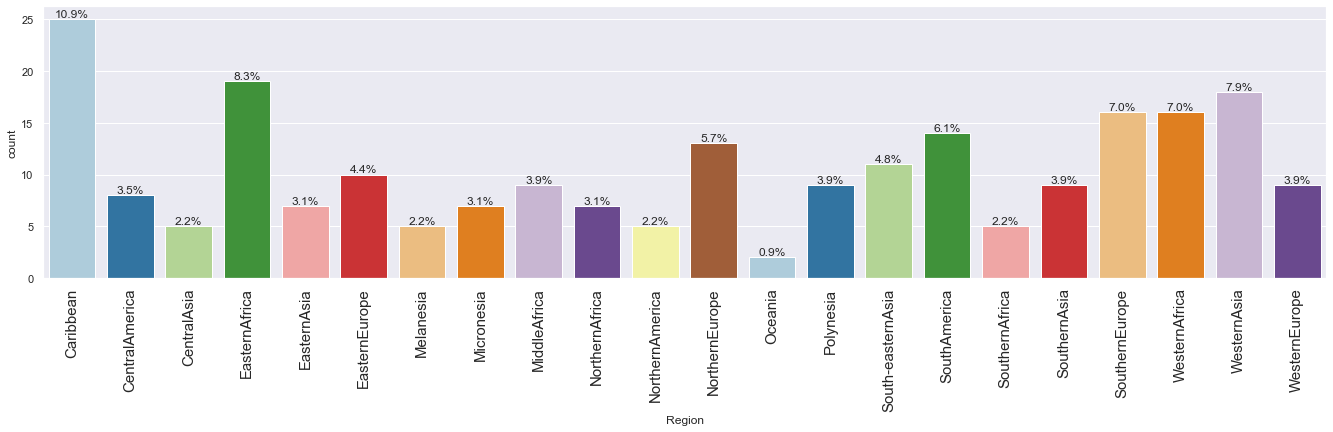

In [ ]:
labeled_barplot(df1, "Region", perc=True)

**Observations**

- Approx. 11% of the countries in the data are from the Caribbean region.
- Oceania has the least number of countries in the data.

In [ ]:
df1.groupby('Region')[['GDP: Gross domestic product','Surface area','Health: Total expenditure','Individuals using the Internet','Population in thousands']].mean().sort_values(by='GDP: Gross domestic product',ascending=False).T

Region,NorthernAmerica,EasternAsia,WesternEurope,Oceania,NorthernEurope,SouthernAsia,SouthAmerica,EasternEurope,SouthernEurope,South-easternAsia,CentralAmerica,WesternAsia,NorthernAfrica,SouthernAfrica,CentralAsia,WesternAfrica,MiddleAfrica,EasternAfrica,Caribbean,Melanesia,Polynesia,Micronesia
GDP: Gross domestic product,4899346.75,2.471837e+06,900572.111111,702138.0,466490.500000,344942.111111,3.079218e+05,257582.90,256651.285714,221895.363636,171279.6250,157790.611111,122709.500000,69318.800,60556.00,40879.933333,25772.888889,17020.500000,15938.190476,7291.000,1327.600000,221.400000
Surface area,4396913.60,1.680572e+06,123206.222222,3980083.5,138357.846154,751558.555556,1.271568e+06,1882619.10,82368.625001,409196.000000,310819.5000,271384.888889,989349.833333,534974.200,800904.00,363919.437500,734764.000000,390542.555556,9722.416667,108154.400,940.444444,442.142857
Health: Total expenditure,13.75,6.950000e+00,9.800000,10.2,8.680000,5.822222,6.975000e+00,7.35,8.250000,3.800000,7.5125,5.229412,6.516667,8.525,5.14,5.866667,4.444444,6.017647,6.700000,4.725,7.940000,10.660000
Individuals using the Internet,348.40,2.555714e+02,77.888889,573.5,40.250000,261.777778,4.512857e+02,83.60,158.437500,532.545455,352.8750,117.111111,119.857143,155.200,56.80,120.375000,227.555556,281.947368,93.960000,338.400,88.888889,119.571429
Population in thousands,72241.40,2.320769e+05,21492.444444,14578.5,8015.384615,207665.000000,3.031393e+04,29245.50,9499.375000,58980.000000,22164.7500,14869.944444,33372.000000,13028.600,14167.80,21730.937500,18166.111111,22166.263158,1748.880000,2064.000,76.222222,75.285714


In [ ]:
## Selecting only 5 countries for univariate analysis
array = ['India','China','United States of America','Australia','Japan']
df = df1.loc[df1['country'].isin(array)]
df.head()

,country,Region,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet
11,Australia,Oceania,7692060.0,24451,3.2,1230859.0,2.5,26.5,71.1,224.0,9.4,5.2,132.8,948.0
45,China,EasternAsia,9600000.0,1409517,150.1,11158457.0,9.2,41.1,49.7,530285.0,5.5,NaN,93.2,1080.0
95,India,SouthernAsia,3287263.0,1339180,450.4,2116239.0,17.0,29.7,53.2,-96378.0,4.7,3.8,78.8,1052.0
104,Japan,EasternAsia,377930.0,127484,349.7,4383076.0,1.2,26.4,72.4,38008.0,10.2,3.6,125.0,404.0
217,United States of America,NorthernAmerica,9833517.0,324460,35.5,18036648.0,1.0,19.7,79.3,-796494.0,17.1,5.4,117.6,1513.0


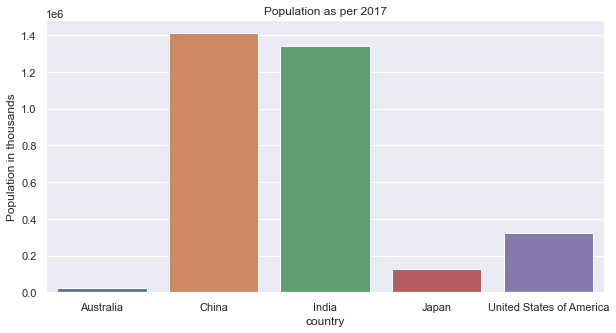

In [ ]:
fig, ax = plt.subplots(figsize =(10, 5))
ax = sns.barplot(y = df['Population in thousands'], x = df['country']).set_title('Population as per 2017')

In [ ]:
def univariateAnalysis_numeric(column, nbins):
    print('Description of '+ column)
    print('-------------------------------------------------------------------------------------------------')
    print(df1[column].describe(),end='')

    plt.figure()
    print('Distribution of '+ column)
    print('-------------------------------------------------------------------------------------------------')
    sns.distplot(df1[column], kde=True, color= 'g')
    plt.show()

    plt.figure()
    print('Boxplot of '+ column)
    print('-------------------------------------------------------------------------------------------------')
    ax= sns.boxplot(x= df1[column])
    plt.show()


In [ ]:
df_num = df1.select_dtypes(include=['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

13

Description of Surface area
-------------------------------------------------------------------------------------------------
count    2.290000e+02
mean     5.899842e+05
std      1.784711e+06
min      1.000000e-05
25%      4.033000e+03
50%      8.387100e+04
75%      4.385740e+05
max      1.709825e+07
Name: Surface area, dtype: float64Distribution of Surface area
-------------------------------------------------------------------------------------------------


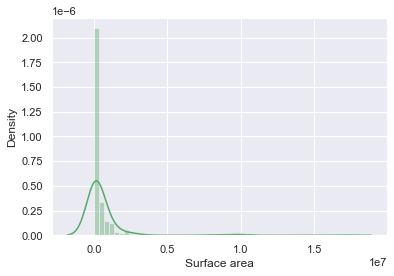

Boxplot of Surface area
-------------------------------------------------------------------------------------------------


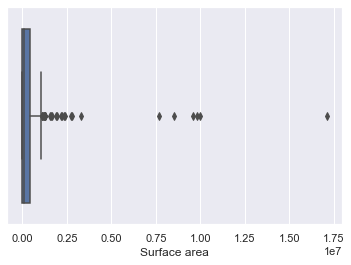

Description of Population in thousands
-------------------------------------------------------------------------------------------------
count    2.290000e+02
mean     3.275679e+04
std      1.332751e+05
min      1.000000e+00
25%      4.310000e+02
50%      5.448000e+03
75%      1.919300e+04
max      1.409517e+06
Name: Population in thousands, dtype: float64Distribution of Population in thousands
-------------------------------------------------------------------------------------------------


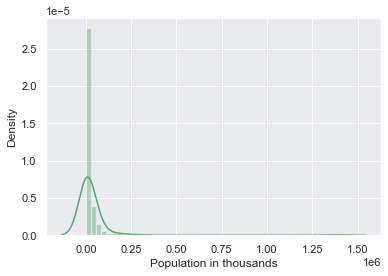

Boxplot of Population in thousands
-------------------------------------------------------------------------------------------------


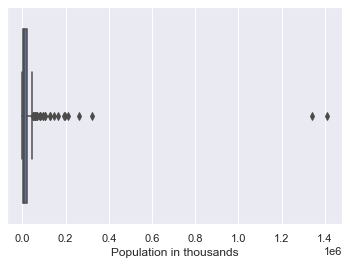

Description of Population density
-------------------------------------------------------------------------------------------------
count      229.000000
mean       462.824891
std       2305.384253
min          0.100000
25%         35.900000
50%         88.100000
75%        222.800000
max      25969.800000
Name: Population density, dtype: float64Distribution of Population density
-------------------------------------------------------------------------------------------------


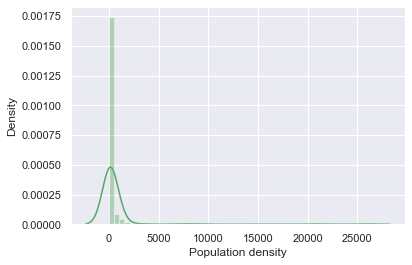

Boxplot of Population density
-------------------------------------------------------------------------------------------------


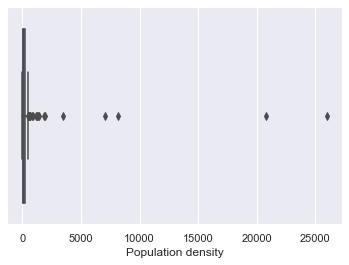

Description of GDP: Gross domestic product
-------------------------------------------------------------------------------------------------
count    2.290000e+02
mean     3.302306e+05
std      1.478016e+06
min      3.300000e+01
25%      4.385000e+03
50%      2.131500e+04
75%      1.647790e+05
max      1.803665e+07
Name: GDP: Gross domestic product, dtype: float64Distribution of GDP: Gross domestic product
-------------------------------------------------------------------------------------------------


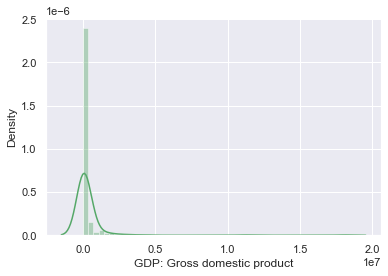

Boxplot of GDP: Gross domestic product
-------------------------------------------------------------------------------------------------


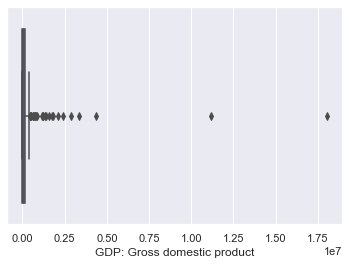

Description of Economy: Agriculture
-------------------------------------------------------------------------------------------------
count    229.000000
mean      11.081004
std       11.742529
min        0.000010
25%        2.300000
50%        7.100000
75%       16.700000
max       70.800000
Name: Economy: Agriculture, dtype: float64Distribution of Economy: Agriculture
-------------------------------------------------------------------------------------------------


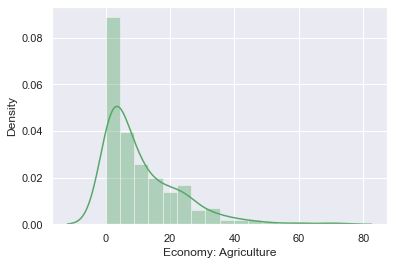

Boxplot of Economy: Agriculture
-------------------------------------------------------------------------------------------------


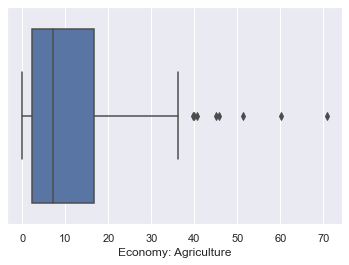

Description of Economy: Industry
-------------------------------------------------------------------------------------------------
count    229.000000
mean      26.835590
std       12.909245
min        4.000000
25%       18.100000
50%       26.300000
75%       32.800000
max       79.900000
Name: Economy: Industry, dtype: float64Distribution of Economy: Industry
-------------------------------------------------------------------------------------------------


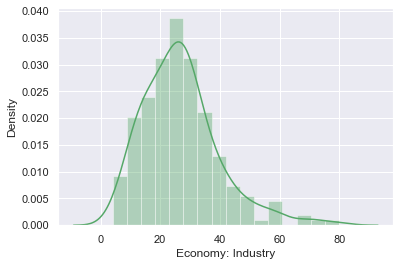

Boxplot of Economy: Industry
-------------------------------------------------------------------------------------------------


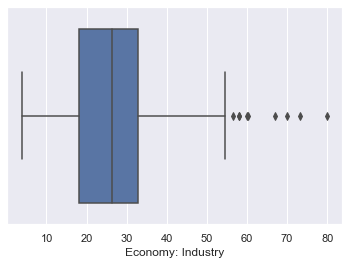

Description of Economy: Services and other activity
-------------------------------------------------------------------------------------------------
count    229.000000
mean      61.667686
std       15.155694
min       14.900000
25%       51.700000
50%       62.500000
75%       72.000000
max       94.000000
Name: Economy: Services and other activity, dtype: float64Distribution of Economy: Services and other activity
-------------------------------------------------------------------------------------------------


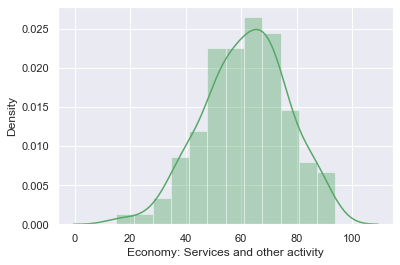

Boxplot of Economy: Services and other activity
-------------------------------------------------------------------------------------------------


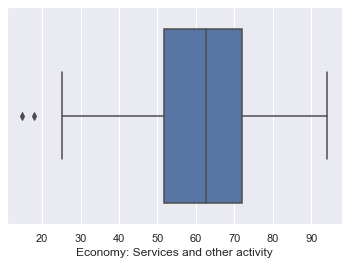

Description of International trade: Balance
-------------------------------------------------------------------------------------------------
count       229.000000
mean       -510.168122
std       70118.529841
min     -796494.000000
25%       -3134.000000
50%        -933.000000
75%         -13.000000
max      530285.000000
Name: International trade: Balance, dtype: float64Distribution of International trade: Balance
-------------------------------------------------------------------------------------------------


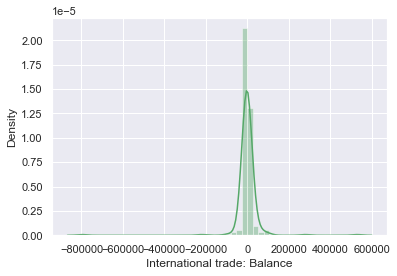

Boxplot of International trade: Balance
-------------------------------------------------------------------------------------------------


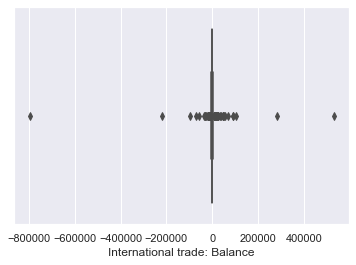

Description of Health: Total expenditure
-------------------------------------------------------------------------------------------------
count    229.000000
mean       6.894760
std        2.736866
min        1.500000
25%        5.100000
50%        6.400000
75%        8.550000
max       17.100000
Name: Health: Total expenditure, dtype: float64Distribution of Health: Total expenditure
-------------------------------------------------------------------------------------------------


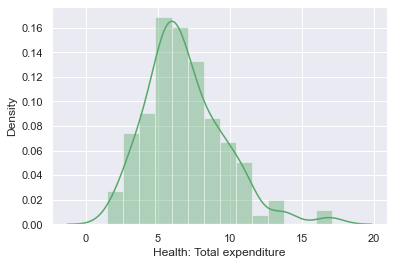

Boxplot of Health: Total expenditure
-------------------------------------------------------------------------------------------------


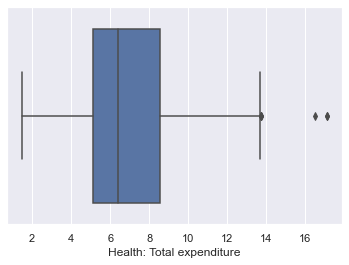

Description of Education: Government expenditure
-------------------------------------------------------------------------------------------------
count    229.000000
mean       4.852838
std        2.024808
min        1.000000
25%        3.600000
50%        4.700000
75%        5.850000
max       12.500000
Name: Education: Government expenditure, dtype: float64Distribution of Education: Government expenditure
-------------------------------------------------------------------------------------------------


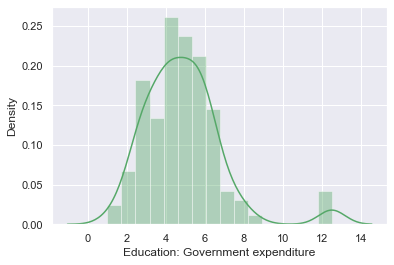

Boxplot of Education: Government expenditure
-------------------------------------------------------------------------------------------------


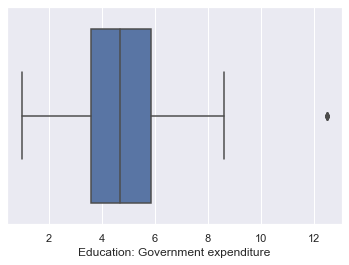

Description of Mobile-cellular subscriptions
-------------------------------------------------------------------------------------------------
count    229.000000
mean     105.879694
std       42.360062
min        7.000000
25%       76.700000
50%      108.800000
75%      129.500000
max      324.400000
Name: Mobile-cellular subscriptions, dtype: float64Distribution of Mobile-cellular subscriptions
-------------------------------------------------------------------------------------------------


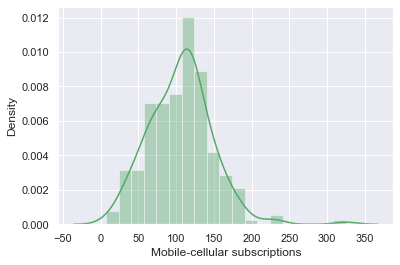

Boxplot of Mobile-cellular subscriptions
-------------------------------------------------------------------------------------------------


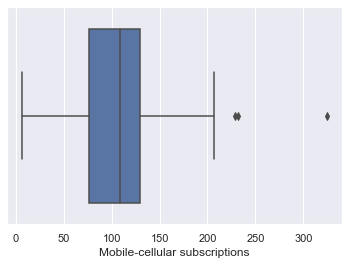

Description of Individuals using the Internet
-------------------------------------------------------------------------------------------------
count     229.000000
mean      199.288210
std       295.999666
min         1.000000
25%        55.000000
50%        97.000000
75%       196.000000
max      2358.000000
Name: Individuals using the Internet, dtype: float64Distribution of Individuals using the Internet
-------------------------------------------------------------------------------------------------


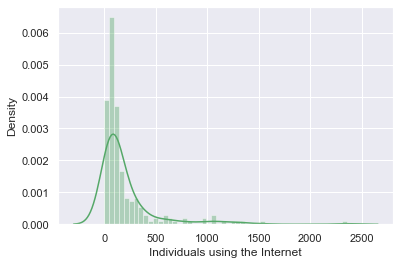

Boxplot of Individuals using the Internet
-------------------------------------------------------------------------------------------------


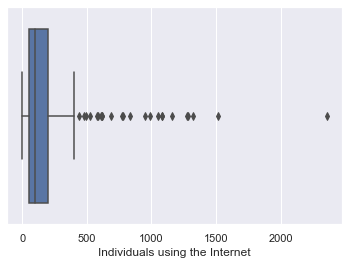

Description of HC_Clusters
-------------------------------------------------------------------------------------------------
count    229.000000
mean       1.113537
std        0.710350
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: HC_Clusters, dtype: float64Distribution of HC_Clusters
-------------------------------------------------------------------------------------------------


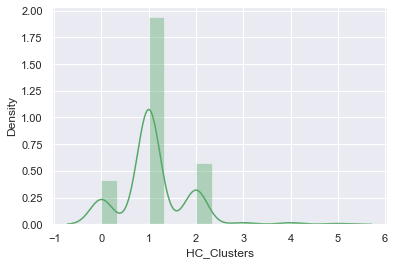

Boxplot of HC_Clusters
-------------------------------------------------------------------------------------------------


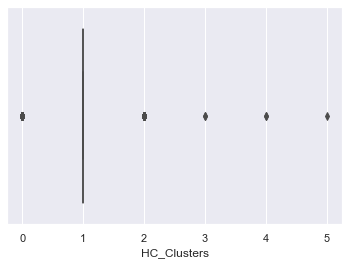

In [ ]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x, 10)

### Bivariate Analysis
**Let's check for correlations.**

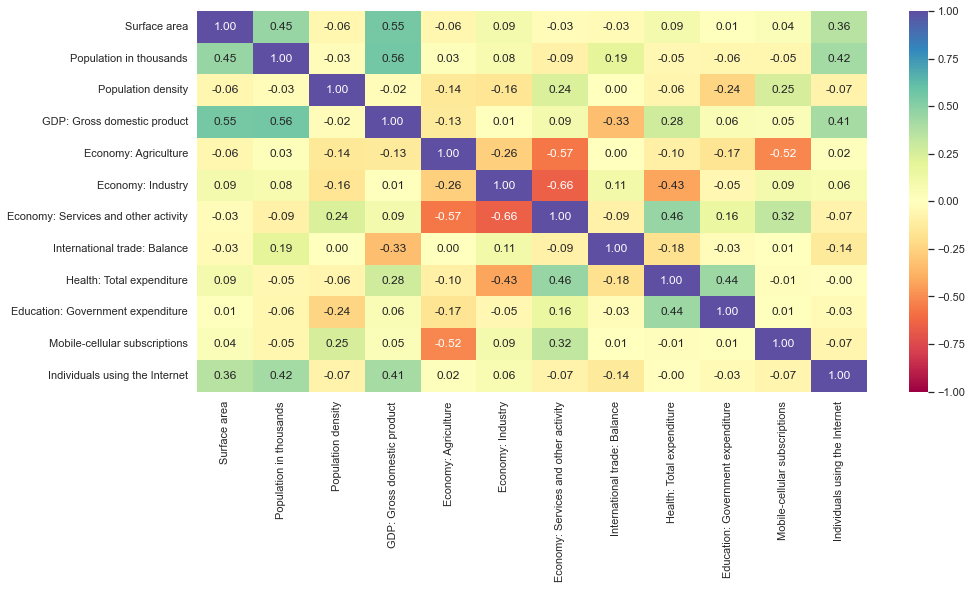

In [ ]:
# selecting numerical columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Data Preprocessing
#### Checking for Null Values

In [ ]:
#Finding missing values in the data set
total = df1.isnull().sum()[df1.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df1)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])


,total_missing,percent
Education: Government expenditure,81,35.37
Health: Total expenditure,39,17.03
Economy: Agriculture,23,10.04
GDP: Gross domestic product,21,9.17
Economy: Industry,21,9.17
Economy: Services and other activity,21,9.17
Mobile-cellular subscriptions,20,8.73
International trade: Balance,19,8.30
Surface area,3,1.31
Individuals using the Internet,1,0.44


### Let's impute these missing values with median since most of the variables are skewed

In [ ]:
for col in df1.iloc[:, 2:].columns.tolist():
    df1[col] = df1.groupby(["Region"])[col].transform(lambda x: x.fillna(x.median()))

# checking for missing values
df1.isna().sum()

country                                 0
Region                                  0
Surface area                            0
Population in thousands                 0
Population density                      0
GDP: Gross domestic product             0
Economy: Agriculture                    0
Economy: Industry                       0
Economy: Services and other activity    0
International trade: Balance            0
Health: Total expenditure               0
Education: Government expenditure       0
Mobile-cellular subscriptions           0
Individuals using the Internet          0
dtype: int64

- All missing values have been imputed.

## Standardization

### **Let's scale the data.**

In [ ]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df1.drop(["country", "Region"], axis=1)),
    columns=df1.drop(["country", "Region"], axis=1).columns,
)
subset_scaled_df.head()

,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet
0,0.035310,0.020854,-0.177549,-0.210173,1.042856,-0.274480,-0.553324,-0.022866,0.477955,-0.768586,-1.047607,-0.532544
1,-0.315158,-0.224289,-0.154727,-0.216092,0.966043,-0.064870,-0.659127,-0.031399,-0.364263,-0.669595,0.012310,-0.234595
2,1.006147,0.064378,-0.193677,-0.112187,0.095503,0.812389,-0.738478,-0.237101,0.111773,0.716281,0.168458,-0.217666
3,-0.331189,-0.245901,-0.080260,-0.223645,-0.152004,-1.159503,0.326156,0.006091,0.111773,-0.471613,-1.036960,-0.363255
4,-0.331038,-0.245743,-0.129991,-0.222011,-0.903058,-1.244900,1.780935,-0.010646,0.441337,-0.768586,-0.420647,-0.630731


In [ ]:
X=subset_scaled_df.copy()

## Apply Hierarachical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [ ]:
# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet


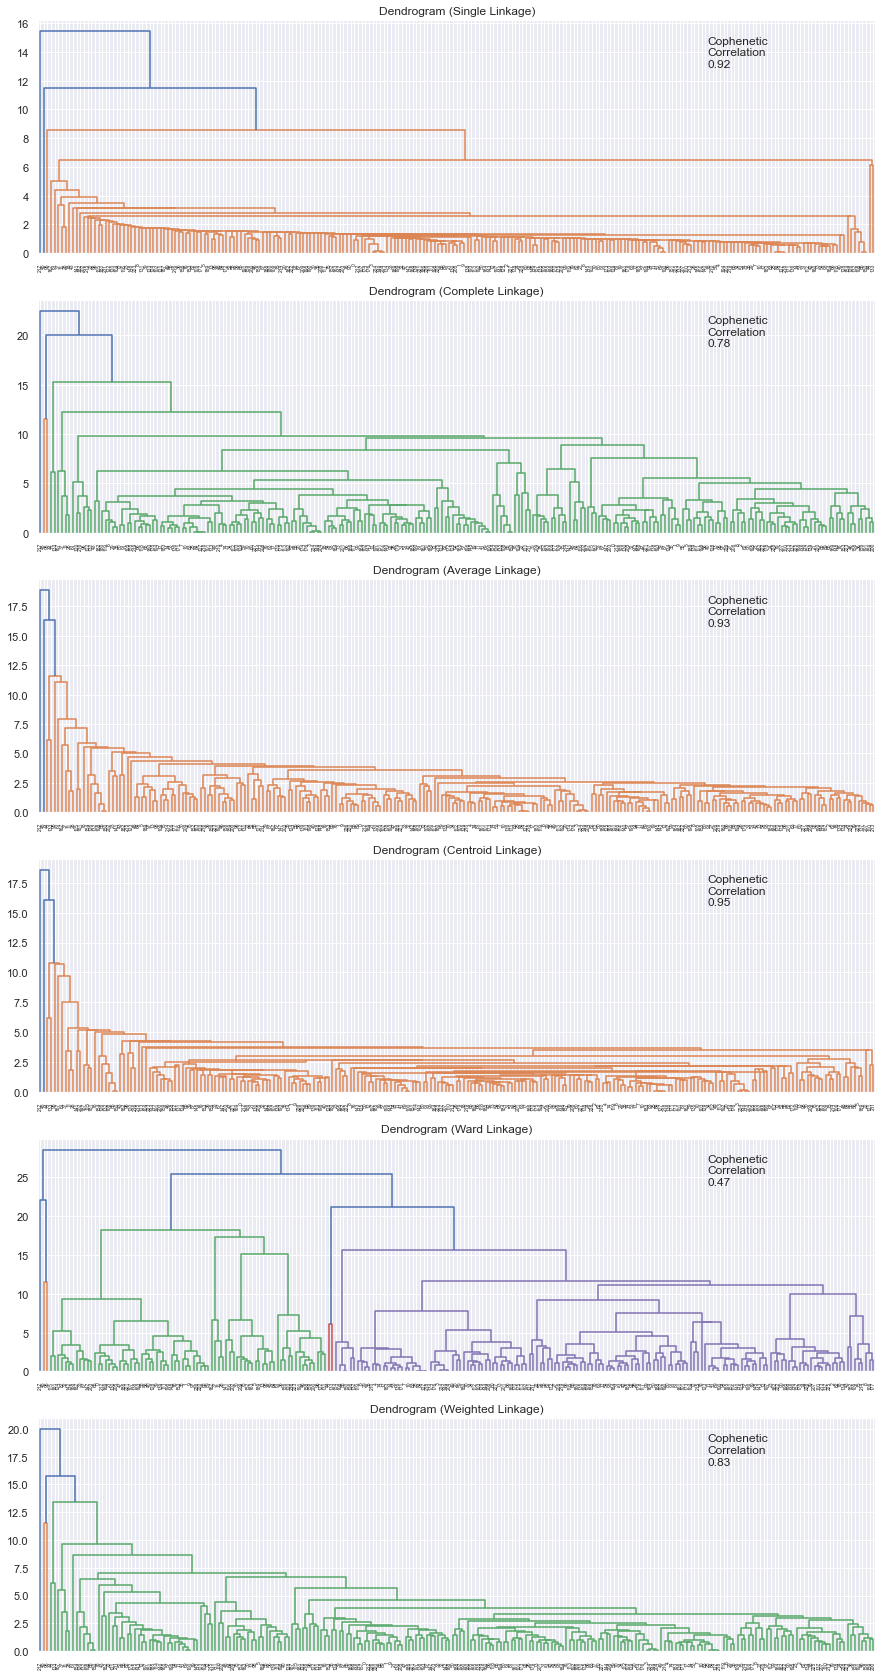

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with Centroid linkage.
- 6 appears to be the appropriate number of clusters from the dendrogram for Centroid linkage.

**The optimal number of clusters from a dendrogram can be obtained by deciding where to cut the cluster tree. Generally, the cluster tree is cut where dendrogram height is maximum as it generally corresponds to distinct and homogeneous clusters.
The dendrogram for centroid linkage had the highest cophenetic correlation. So we can use centroid linkage and have chosen 6 clusters as the dendrogram height is pretty high. (The maximum height is for 3, but that would not be meaningful as it would give two clusters with one country each and one cluster will all the other countries).**

**Lets visualize the dendrogram cut for average link in the below plot**

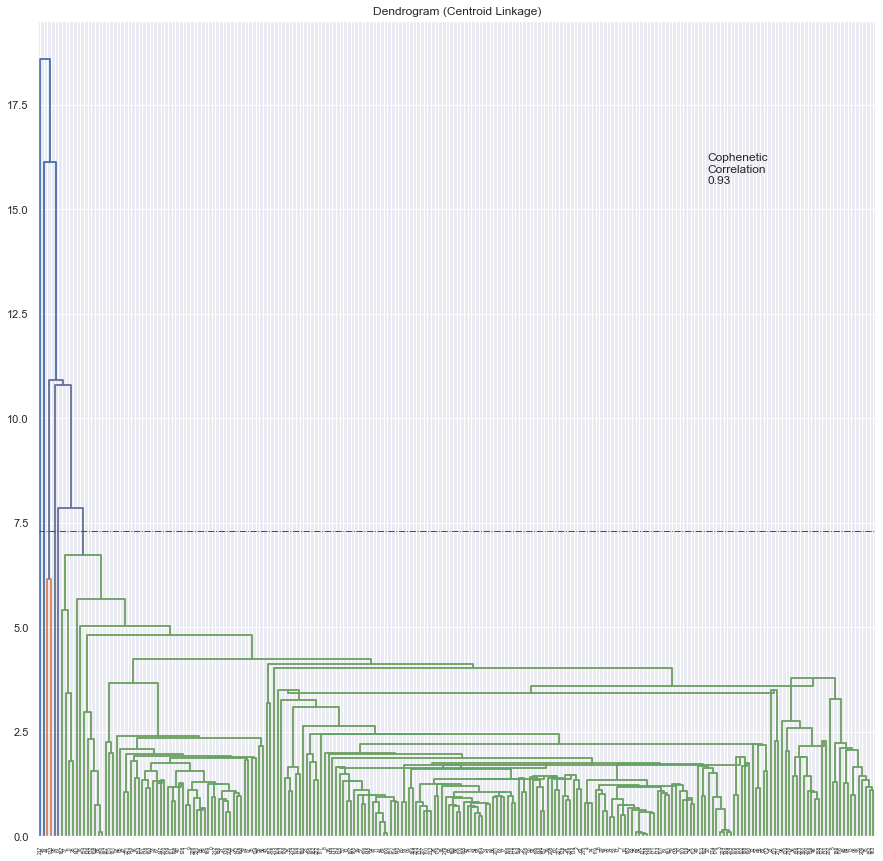

In [ ]:
# list of linkage methods
linkage_methods = ["centroid"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=7.3)
plt.axhline(y=7.3, c="red", lw=1, linestyle="dashdot")

## Hierarchical Clustering

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [ ]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

### Cluster profiling

In [ ]:
H_clust= pd.DataFrame(df1.HC_Clusters.value_counts().sort_index())
H_clust

,HC_Clusters
0,223
1,2
2,1
3,1
4,1
5,1


In [ ]:
cluster_profile = df1.groupby("HC_Clusters").mean()
cluster_profile['Freq']= df1.HC_Clusters.value_counts().sort_index()
cluster_profile.T

HC_Clusters,0,1,2,3,4,5
Surface area,502817.757848,16.000,257217.0,9833517.0,3287263.0,9600000.0
Population in thousands,19779.650224,331.000,16625.0,324460.0,1339180.0,1409517.0
Population density,262.298655,23395.700,66.9,35.5,450.4,150.1
GDP: Gross domestic product,198021.744395,26218.000,100177.0,18036648.0,2116239.0,11158457.0
Economy: Agriculture,11.182960,3.225,10.1,1.0,17.0,9.2
Economy: Industry,26.909193,10.000,34.1,19.7,29.7,41.1
Economy: Services and other activity,61.452466,90.000,55.8,79.3,53.2,49.7
International trade: Balance,1020.163677,8826.500,609.0,-796494.0,-96378.0,530285.0
Health: Total expenditure,6.868386,5.375,9.2,17.1,4.7,5.5
Education: Government expenditure,4.890135,1.500,5.0,5.4,3.8,3.6


### OR

In [ ]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,Freq
HC_Clusters,,,,,,,,,,,,,
0,502817.757848,19779.650224,262.298655,198021.744395,11.182960,26.909193,61.452466,1020.163677,6.868386,4.890135,105.220852,177.587444,223
1,16.000000,331.000000,23395.700000,26218.000000,3.225000,10.000000,90.000000,8826.500000,5.375000,1.500000,206.600000,16.000000,2
2,257217.000000,16625.000000,66.900000,100177.000000,10.100000,34.100000,55.800000,609.000000,9.200000,5.000000,79.400000,2358.000000,1
3,9833517.000000,324460.000000,35.500000,18036648.000000,1.000000,19.700000,79.300000,-796494.000000,17.100000,5.400000,117.600000,1513.000000,1
4,3287263.000000,1339180.000000,450.400000,2116239.000000,17.000000,29.700000,53.200000,-96378.000000,4.700000,3.800000,78.800000,1052.000000,1
5,9600000.000000,1409517.000000,150.100000,11158457.000000,9.200000,41.100000,49.700000,530285.000000,5.500000,3.600000,93.200000,1080.000000,1


**We see that there are 5 clusters of one country, 1 cluster of two countries, and all the other countries are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.**

**On checking the cluster profiles, it's found centroid linkage still does not give proper clustering as 5 clusters have one or two countries in them. On checking the dendrogram for different linkages further, the Ward linkage gives us homogeneous clusters, with more variability between clusters, despite a low cophenetic correlation. Let us try using Ward linkage as it has more distinct and separated clusters (as seen from its dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

### Let's try with 'Wards' linkage method

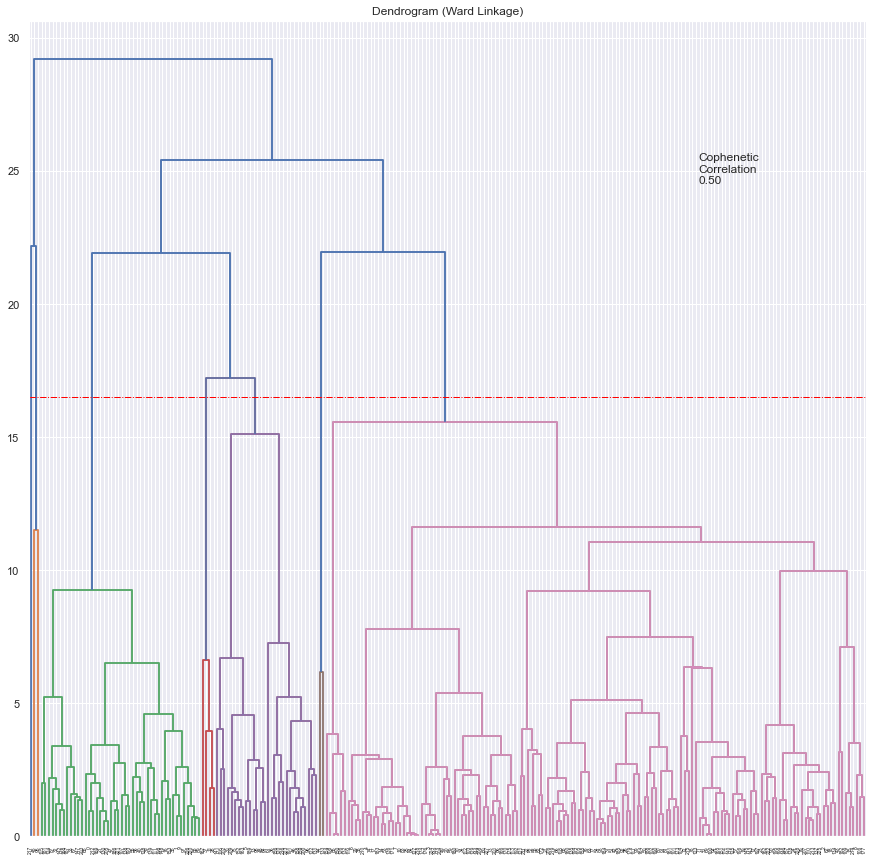

In [ ]:
# list of linkage methods
linkage_methods = ["ward"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=16.5)
plt.axhline(y=16.5, c="red", lw=1, linestyle="dashdot")

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=6)

In [ ]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

In [ ]:
H_clust= pd.DataFrame(df1.HC_Clusters.value_counts().sort_index())
H_clust

,HC_Clusters
0,32
1,148
2,44
3,2
4,2
5,1


In [ ]:
cluster_profile = df1.groupby("HC_Clusters").mean()
cluster_profile['Freq']= df1.HC_Clusters.value_counts().sort_index()
cluster_profile.T

HC_Clusters,0,1,2,3,4,5
Surface area,1.857324e+06,220764.489865,460865.261364,6443631.50,16.000,9833517.0
Population in thousands,4.570966e+04,10516.020270,32009.250000,1374348.50,331.000,324460.0
Population density,9.706562e+01,331.800676,144.247727,300.25,23395.700,35.5
GDP: Gross domestic product,3.293480e+05,213967.959459,46650.704545,6637348.00,26218.000,18036648.0
Economy: Agriculture,8.393750e+00,6.521284,28.867045,13.10,3.225,1.0
Economy: Industry,4.387188e+01,24.186149,23.895455,35.40,10.000,19.7
Economy: Services and other activity,4.774688e+01,68.686149,46.960227,51.45,90.000,79.3
International trade: Balance,4.106188e+03,915.722973,-882.261364,216953.50,8826.500,-796494.0
Health: Total expenditure,4.906250e+00,7.706081,5.530682,5.10,5.375,17.1
Education: Government expenditure,4.314063e+00,5.362162,3.723864,3.70,1.500,5.4


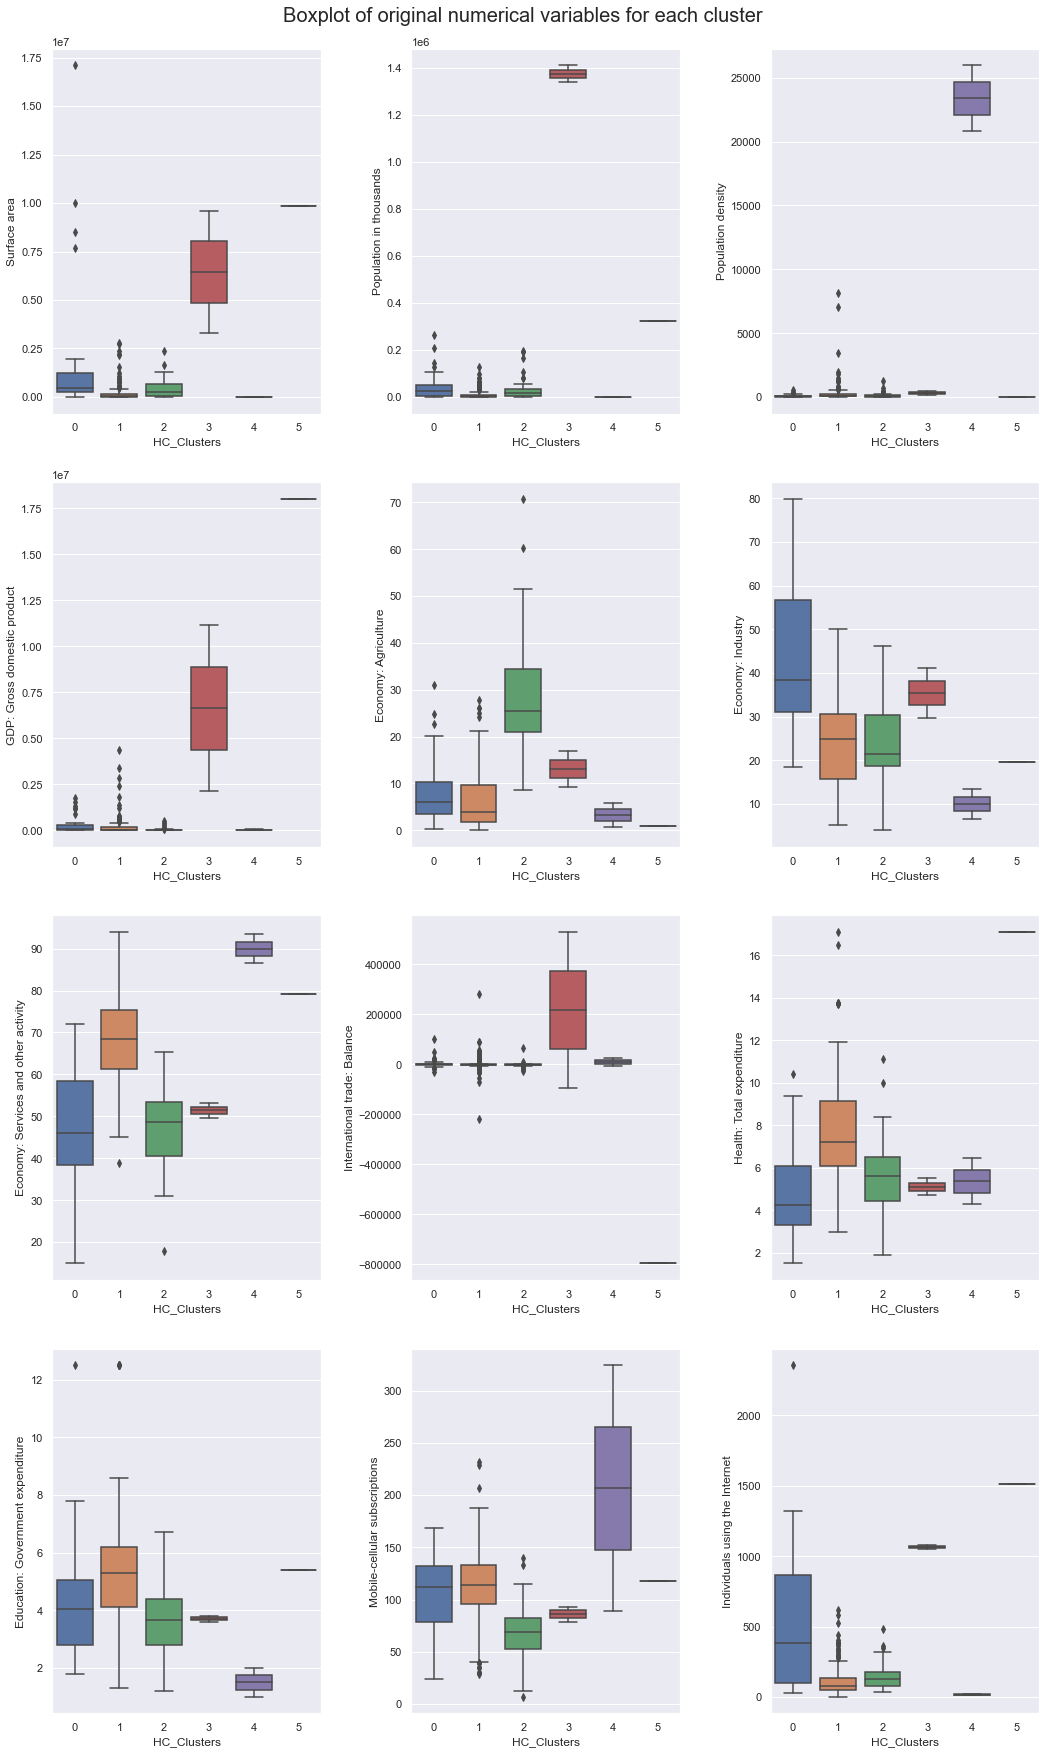

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(15, 25))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(ax=axes[ii][0], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][1], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][2], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1


fig.tight_layout(pad=2.0)

## Insights

We will look into clusters 0, 2, and 5 only because the other clusters have only 1 or 2 countries in them.

- **Cluster 0**
   - There are 32 countries in this cluster.
   - The number of individuals using the internet is moderate and mobile subscribers are moderate.
   - Expenditure on health is low to moderate and that on education is also low to moderate.
   - GDP is low, but the economy in healthy and balanced across agriculture, industry, services, and other activities are high
   
   
- **Cluster 2**
   - There are 148 countries in this cluster.
   - The number of individuals using the internet is high but mobile subscribers are moderate.
   - Expenditure on health is moderate and that on education is also moderate.
   - GDP is moderate and economy is moderately healthy with a slightly high dependence on services and other activities.
   
   
- **Cluster 5**
   - There are 44 countries in this cluster.
   - The number of individuals using the internet are moderate and mobile subscribers are also moderate.
   - Expenditure on health is moderate and that on education is low.
   - GDP is moderate and economy is moderately healthy with a slightly high dependence on services and other activities.


## Recommendations

**Cluster 5 countries are good places to provide tourism services based on cluster profiling done above.**

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [ ]:
# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(X)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [ ]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.40176606785402263

- The first two principal components explain 40% of the variance in the data.

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

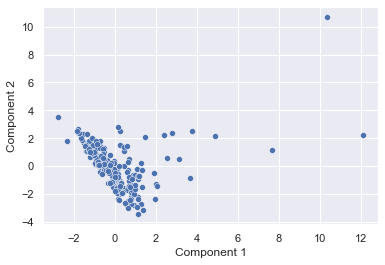

In [ ]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

In [ ]:
import plotly.express as px
fig = px.scatter(X_pca, x=0, y=1,color=df1['Surface area'])
fig.show()

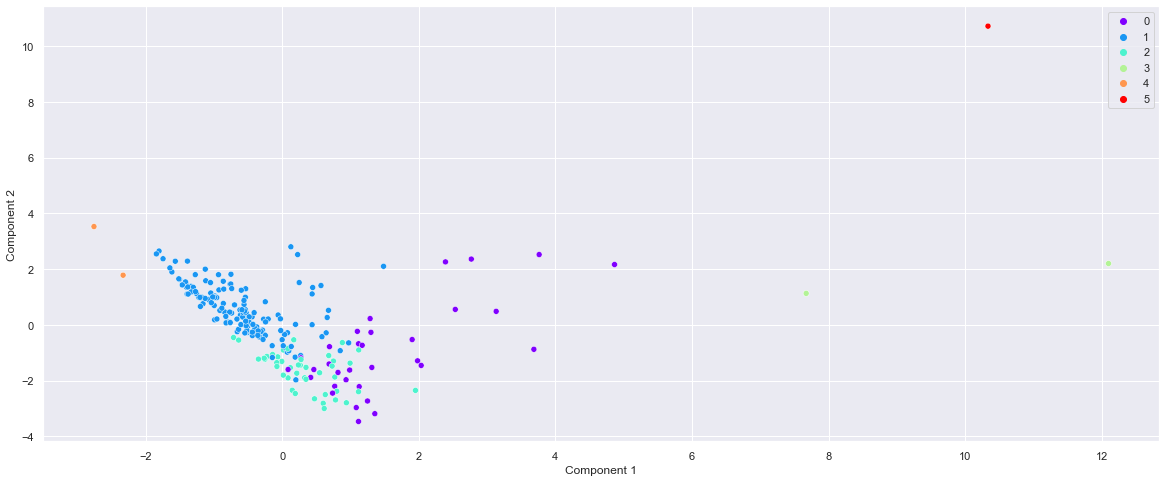

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df1["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1,1))

- Cluster 0, 1 and 2 are the major clusters.

******************************* HAPPY LEARNING ***************************************